## Draft metrics of dataset value

In [1]:
from rc_util import * # to do: add 'calc_data_badge' function or similar

In [2]:
# build a graph from the JSON-LD corpus
net = RCNetwork()

# net.parse_corpus(Path("../corpus/corpus.jsonld"))
# rank and scale each entity
# net.build_analytics_graph()

In [4]:
# parses, builds NetworkX graph, and creates default "rank" for each entity
net.load_network("full.jsonld") # net.load_network("../../rclc/corpus.jsonld")

31869.44890022278

#### simple ways to explore the RCNetwork

In [ ]:
# view an element of the graph
net.data['dataset-b1b062c8a276fe2800fd'].view

In [ ]:
# net.prov['provider-99fda6d9f6fbf67c3f72'].view

net.prov['provider-99fda6d9f6fbf67c3f72'].view['title']

In [ ]:
# net.get_id('publication-639196e25a9adcadaaf2')
# net.id_list # returns

net.get_id('dataset-b1b062c8a276fe2800fd') # to find in nxg if needed

In [ ]:
len(net.publ.keys()), len(net.prov.keys()), len(net.data.keys())

In [ ]:
subgraph, paths, node_id = net.get_subgraph('NOAA', 2)

In [ ]:
# no entries with full NOAA name
for p in net.prov.keys():
    if net.prov[p].view['title']=='National Oceanic and Atmospheric Administration':
        print(net.prov[p].view)

In [ ]:
# provider entry uses abbreviation
for p in net.prov.keys():
    if net.prov[p].view['title']=='NOAA':
        print(net.prov[p].view)

In [ ]:
## gather NOAA datasets

data_list = []

for d in net.data.keys():
    if net.data[d].view['provider']=='provider-e4db130cccc74f809faf':
#         print(net.data[d].view)
        data_list.append(net.data[d].view['id'])

### some more ways to access RCNetwork

In [ ]:
net.data[data_list[3]].view

In [ ]:
# edges from this node
net.nxg[net.get_id(net.data[data_list[3]].view["id"])]

In [ ]:
net.id_list[2617]

In [ ]:
net.labels[25501]

In [ ]:
# test 'recommended links' function
uuid, title, rank, url, provider, publ_list = net.reco_data(net.data[data_list[3]])

In [ ]:
for pub in net.publ.keys():
    if 'dataset-26993827b8a6f43da2bc' in net.publ[pub].view['datasets']:
        print(net.publ[pub].view)

In [ ]:
for pub in publ_list:
    print(pub)

In [ ]:
net.publ[net.id_list[25501]].view

In [ ]:
# spot check a dataset in the list is found in at least some publications
for p in net.publ.keys():
        if data_list[4] in net.publ[p].view['datasets']:
            print('found data')

In [ ]:
## replicate for USDA
for p in net.prov.keys():
    if net.prov[p].view['title']=='USDA':
        print(net.prov[p].view)

In [ ]:
for p in net.prov.keys():
    if net.prov[p].view['title']=='US Department of Agriculture':
        print(net.prov[p].view)

In [ ]:
## gather USDA datasets

data_list = []

for d in net.data.keys():
    if net.data[d].view['provider']=='provider-d2d242eddffb73cc92c0':
        print(net.data[d].view['id'], net.data[d].view['title'])
        data_list.append(net.data[d].view['id'])

In [ ]:
net.reco_data(net.data['dataset-f65e9e0b7b63697db36a'])

In [ ]:
net.publ[net.id_list[2775]].view

In [ ]:
for p in net.prov.keys():
    if net.prov[p].view['title']=='IRI':
        print(net.prov[p].view)

In [ ]:
# gete dataset ids for just IRI
data_list = []

for d in net.data.keys():
    if net.data[d].view['provider']=='provider-19eb7b3b445e1a00d385':
        print(net.data[d].view['id'], net.data[d].view['title'])
        data_list.append(net.data[d].view['id'])

In [5]:
num_datasets = len(set(net.data.keys()))

num_publications = len(set(net.publ.keys()))

num_providers = len(set(net.prov.keys()))

num_authors = len(set(net.auth.keys()))

print("this corpus has: \n--{:,.0f} datasets \n--{:,.0f} publications \n--{:,.0f} providers \n--{:,.0f} authors".format(
num_datasets, num_publications, num_providers, num_authors))

this corpus has: 
--619 datasets 
--3,816 publications 
--378 providers 
--8,249 authors


In [6]:
net.data['dataset-f65e9e0b7b63697db36a'].view

{'id': 'dataset-f65e9e0b7b63697db36a',
 'title': 'Nielsen Homescan',
 'provider': 'provider-d2d242eddffb73cc92c0',
 'url': 'https://catalog.data.gov/dataset/nielsen-homescan',
 'used': True}

In [7]:
net.prov['provider-d2d242eddffb73cc92c0'].view

{'id': 'provider-d2d242eddffb73cc92c0',
 'title': 'US Department of Agriculture',
 'ror': 'https://ror.org/01na82s61',
 'used': True}

### Gather dataset labels and initial measures

In [ ]:
# # V1 - was not sure of `reco_data()` grabbed all publications; appears it does
# DataID = [] # RC UUID
# DataName = [] # title
# DataRank = [] # rank
# RecPubCount = [] # count of publications from 'recommender'
# TotPubCount = [] # total publications that are linked to this dataset
# CombinedData = [] # total count of other datasets linked to publications
# UniqueCombData = [] # unique count of other datsets linked to publications

# for d in data_list:
#     # gather  info from 'recommender'; it sorts the publications based on Eigenvector calc of 'rank'
#     uuid, title, rank, url, provider, publ_list = net.reco_data(net.data[d])
#     DataID.append(uuid)
#     DataName.append(title)
#     DataRank.append(rank)
#     RecPubCount.append(len(publ_list))
#     # search through all publications for current dataset
#     co_data = []
#     num_pubs = 0
#     for p in net.publ.keys():
#         if d in net.publ[p].view['datasets']:
#             num_pubs += 1 # pub uses current data
#             d_list = net.publ[p].view['datasets'].copy()
#             d_list.remove(uuid) # don't include current dataset
#             co_data = co_data + d_list # ** LIST OF DATASETS; use to eg calculate data provider co-occurence
#             #print('----- added pub')
#     TotPubCount.append(num_pubs)
#     CombinedData.append(len(co_data))
#     UniqueCombData.append(len(set(co_data)))
    
# # save metrics to dataframe to explore
# df = pd.DataFrame({'RC_uuid': DataID, 'Dataset_Name': DataName, 'RC_rank': DataRank, 'num_rec_pubs': RecPubCount,
#                   'total_pubs': TotPubCount, 'combined_data': CombinedData, 'num_unique_data_join': UniqueCombData})

In [17]:
# V2 - make better use of `reco_data()`
DataID = [] # RC UUID
DataName = [] # title
DataURL = [] # reference URL
DataProv = [] # dataset provider
DataRank = [] # rank
TotPubCount = [] # total publications that are linked to this dataset
CombinedData = [] # total count of other datasets linked to publications
UniqueCombData = [] # unique count of other datsets linked to publications
NumSameProv = [] # number of datasets joined to this dataset owned by same provider
NumOtherProv = [] # number of datasets joined to this dataset owned by a different provider
UniqueOtherProv = [] # unique count of other providers

for d in net.data.keys(): #data_list:
    # gather  info from 'recommender'; it sorts the publications based on Eigenvector calc of 'rank'
    uuid, title, rank, url, provider, publ_list = net.reco_data(net.data[d])
    DataID.append(uuid)
    DataName.append(title)
    DataRank.append(rank)
    DataURL.append(url)
    DataProv.append(provider[1]) # grab name for now; 2nd element of "provider"
    TotPubCount.append(len(publ_list))
    # collect datasets linked to publications for current dataset
    co_data = []
    for p_id, _title, _rank in publ_list:
        d_list = net.publ[net.id_list[p_id]].view['datasets'].copy()
        d_list.remove(uuid) # don't include current dataset
        co_data = co_data + d_list # ** LIST OF DATASETS; use to eg calculate data provider co-occurence
    CombinedData.append(len(co_data))
    UniqueCombData.append(len(set(co_data)))
    # summarize datasets by this provider vs other providers
    co_prov = [net.prov[net.data[co].view['provider']].view['id'] for co in co_data]
    NumSameProv.append(len([p for p in co_prov if p==net.data[d].view['provider']]))
    other_provs = [p for p in co_prov if p!=net.data[d].view['provider']]
    NumOtherProv.append(len(other_provs))
    UniqueOtherProv.append(len(set(other_provs)))

In [18]:
# save metrics to dataframe to explore
df = pd.DataFrame({'RC_uuid': DataID, 'Dataset_Name': DataName, 
                   'RC_URL': DataURL, 'RC_Provider': DataProv, 'RC_rank': DataRank, 
                  'total_pubs': TotPubCount, 'combined_data': CombinedData, 'num_unique_data_join': UniqueCombData,
                  'count_same_prov': NumSameProv, 'count_diff_prov': NumOtherProv, 
                   'num_unique_diff_prov': UniqueOtherProv})

In [19]:
df.head()

,RC_uuid,Dataset_Name,RC_URL,RC_Provider,RC_rank,total_pubs,combined_data,num_unique_data_join,count_same_prov,count_diff_prov,num_unique_diff_prov
0,dataset-d7abbc1e566a22068f1d,Maine Sea Level Rise,https://mgs-maine.opendata.arcgis.com/datasets...,Maine Geological Survey,0.0435,1,1,1,0,1,1
1,dataset-b2063e7c8ba68a048d87,Iowa Medicaid Information System,https://dhs.iowa.gov/ime/contracts/resource-li...,Iowa Department of Human Services,0.0092,1,5,5,5,0,0
2,dataset-5eb698d20631f3425eba,The Special Nutrition Program Operations Study,https://www.fns.usda.gov/special-nutrition-pro...,US Department of Agriculture,0.8123,1,0,0,0,0,0
3,dataset-c8d47db36ff66f36666b,Billion-Dollar Weather and Climate Disasters,https://www.ncdc.noaa.gov/billions/events,NOAA,0.2970,3,0,0,0,0,0
4,dataset-7342a430cff8e8ba688a,New York State Division of Criminal Justice Se...,https://www.criminaljustice.ny.gov/crimnet/ojs...,New York State Division of Criminal Justice Se...,0.3280,3,18,16,0,18,16


In [ ]:
df[df['RC_Provider']=='NOAA']

In [ ]:
df.shape

In [ ]:
# save metrics as table
df.to_csv('rc_metrics_full_0915.csv', index=False)

### data checking

In [ ]:
## spot check pub list returned by recommender
for publist in net.reco_data(net.data['dataset-f513907681e789b16587'])[5]:
    pub = net.publ[net.id_list[publist[0]]]
    print(pub.view['title'])
    print('---', pub.view['datasets'])

In [ ]:
## confirm same publications returned
for pkey in net.publ.keys():
    if 'dataset-f513907681e789b16587' in net.publ[pkey].view['datasets']:
        print(net.publ[pkey].view['title'])
        print('--',net.publ[pkey].view['datasets'])

In [ ]:
for publist in net.reco_data(net.data['dataset-545bdd82bd282357400b'])[5]:
    pub = net.publ[net.id_list[publist[0]]]
    print(pub.view['title'])
    print('---', pub.view['datasets'])

In [ ]:
for pkey in net.publ.keys():
    if 'dataset-545bdd82bd282357400b' in net.publ[pkey].view['datasets']:
        print(net.publ[pkey].view['title'])
        print('--',net.publ[pkey].view['datasets'])

In [ ]:
for pkey in net.publ.keys():
    if 'dataset-df0ad972c8f854896ac4' in net.publ[pkey].view['datasets']:
        print(net.publ[pkey].view['title'])
        print('--',net.publ[pkey].view['datasets'])


In [ ]:
for pkey in net.publ.keys():
    if 'dataset-df0ad972c8f854896ac4' in net.publ[pkey].view['datasets']:
        print(net.publ[pkey].view['title'])
        print('--',net.publ[pkey].view['datasets'])

### some simple visuals

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 
df_vis = df.groupby('RC_Provider')['total_pubs'].sum().reset_index().sort_values('total_pubs', ascending=False)

In [ ]:
df_vis.shape

In [ ]:
df_vis.head(10)

In [ ]:
df_vis.iloc[:20,:].plot(x='RC_Provider', y='total_pubs' , kind='bar', figsize=(14,8), title='Total publications by data provider');

In [ ]:
## mean
df_vis = df.groupby('RC_Provider')['total_pubs'].mean().reset_index().sort_values('total_pubs', ascending=False)

df_vis.iloc[:20,:].plot(x='RC_Provider', y='total_pubs' , kind='bar', figsize=(14,8), title='Average (mean) publications by data provider');

In [ ]:
print(net.topi.keys())

In [21]:
df[df['RC_Provider']=='NOAA'].head()

,RC_uuid,Dataset_Name,RC_URL,RC_Provider,RC_rank,total_pubs,combined_data,num_unique_data_join,count_same_prov,count_diff_prov,num_unique_diff_prov
3,dataset-c8d47db36ff66f36666b,Billion-Dollar Weather and Climate Disasters,https://www.ncdc.noaa.gov/billions/events,NOAA,0.2970,3,0,0,0,0,0
7,dataset-12e53d67c1e289b8fd01,US Climate Divisions,https://www.ncdc.noaa.gov/monitoring-reference...,NOAA,0.5919,4,11,11,5,6,1
40,dataset-9c5fed76bbcb0ce5d978,Economics: National Ocean Watch,https://coast.noaa.gov/digitalcoast/data/enow....,NOAA,0.3947,11,14,9,2,12,6
41,dataset-2d02a870a1d2cfd86a6c,National Land Cover Database,https://coast.noaa.gov/digitalcoast/data/nlcd....,NOAA,0.4478,6,22,20,3,19,12
87,dataset-df0ad972c8f854896ac4,Global Forecast System,https://www.ncdc.noaa.gov/data-access/model-da...,NOAA,0.7782,50,0,0,0,0,0


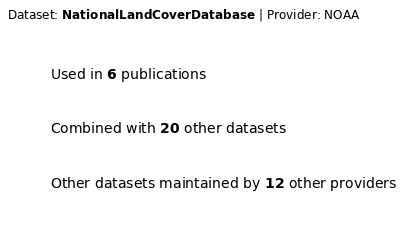

In [40]:
## this dataset with (1) same providers data and (2) other providers data

## draft "badge" with (1) number of publications, (2) number of other datasets, 
## (3) unique datasets, (4) same providers data, (5) other providers data

data_name = 'National Land Cover Database'
data_prov = 'NOAA'
num_pubs = 6
num_other_data = 20
joined_same_prov = 3
joined_other_prov = 19
num_other_prov = 12

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title(r'Dataset: $\bf{}$ | Provider: {}'.format(data_name, data_prov))
ax.text(.1, .75, r'Used in $\bf{}$ publications'.format(num_pubs), fontsize=14)
ax.text(.1, .5, r'Combined with $\bf{}$ other datasets'.format(num_other_data), fontsize=14)
ax.text(.1, .25, r'Other datasets maintained by $\bf{}$ other providers'.format(num_other_prov), fontsize=14)
ax.axis('off');